Importing the dependencies and packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

Data Collection and preprocessing

In [2]:
exercise_dataset=pd.read_csv('exercise.csv')
calories_dataset=pd.read_csv('calories.csv')

In [4]:
exercise_dataset.shape

(15000, 8)

In [5]:
calories_dataset.shape

(15000, 2)

In [6]:
exercise_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
calories_dataset.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


combine data from the two sources

In [9]:
calories_data=pd.merge(exercise_dataset,calories_dataset)

In [10]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
calories_data.shape

(15000, 9)

In [13]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [15]:
#statistical measure of the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [16]:
calories_data.groupby('Gender').mean()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Gender,,,,,,,,
female,1.497932e+07,42.735469,164.405931,63.274460,15.502185,95.408579,40.019833,88.153052
male,1.497537e+07,42.844904,184.667517,86.825702,15.559420,95.630052,40.031153,90.945750


Data Visualziation 

In [17]:
sns.set()

<AxesSubplot:xlabel='Gender', ylabel='count'>

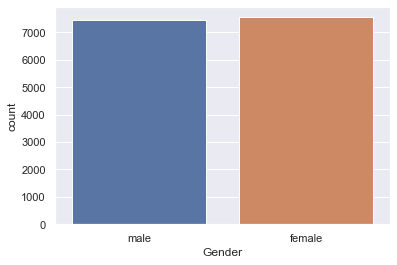

In [18]:
sns.countplot(x='Gender',data=calories_data)

C:\Users\80217530\AppData\Local\Continuum\anaconda3\envs\cnnenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

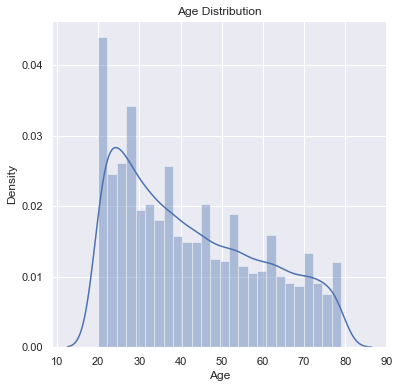

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data.Age)
plt.title('Age Distribution')

C:\Users\80217530\AppData\Local\Continuum\anaconda3\envs\cnnenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Height Distribution')

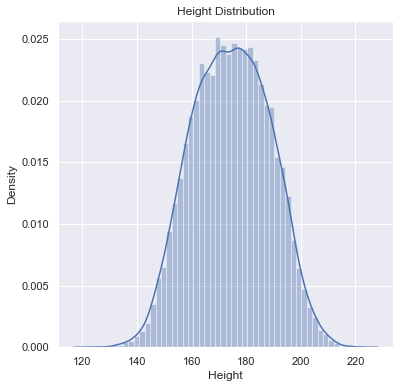

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data.Height)
plt.title('Height Distribution')

C:\Users\80217530\AppData\Local\Continuum\anaconda3\envs\cnnenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Weight Distribution')

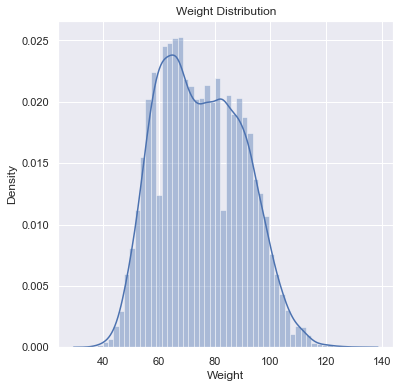

In [21]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data.Weight)
plt.title('Weight Distribution')

C:\Users\80217530\AppData\Local\Continuum\anaconda3\envs\cnnenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Heart Rate Distribution')

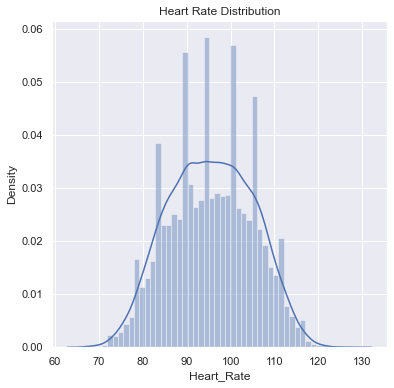

In [22]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data.Heart_Rate)
plt.title('Heart Rate Distribution')

C:\Users\80217530\AppData\Local\Continuum\anaconda3\envs\cnnenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Duration Distribution')

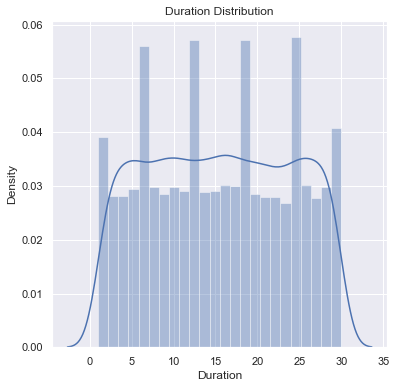

In [23]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data.Duration)
plt.title('Duration Distribution')

C:\Users\80217530\AppData\Local\Continuum\anaconda3\envs\cnnenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Body Temp Distribution')

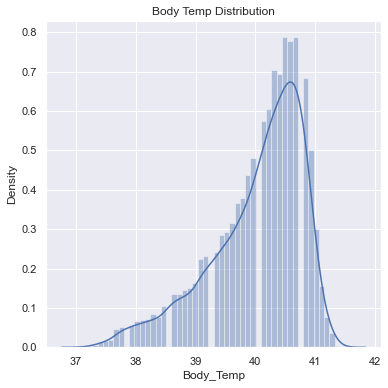

In [24]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data.Body_Temp)
plt.title('Body Temp Distribution')

Finding corelation in the data

In [29]:
correlation= calories_data.corr()

constructing heat map to understand the correlation 

<AxesSubplot:>

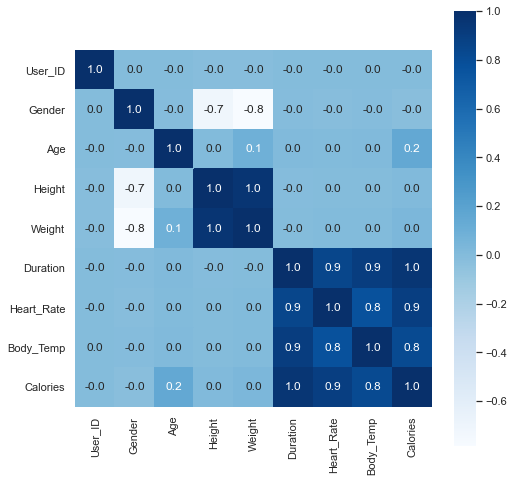

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')

Encoding the categorical column 

In [27]:
calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True)


In [31]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separate features from target variable

In [32]:
X=calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y=calories_data['Calories']

SPlitting the training and testing data

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Modelling and training 

In [34]:
xgBoostReg=XGBRegressor()

training and fitting the train data

In [35]:
xgBoostReg.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
#doing prediction on the training data
X_train_prediction = xgBoostReg.predict(X_train)

In [37]:
##training accuracy 
# R square error 
trainscore_1=metrics.r2_score(Y_train,X_train_prediction)
trainscore_2= metrics.mean_absolute_error(Y_train,X_train_prediction)
print('R2 score',trainscore_1)
print('Mean absolute error',trainscore_2)

R2 score 0.9995517443430838
Mean absolute error 0.9656331550205747


In [38]:
#evaluating on the testing data 
X_test_prediction = xgBoostReg.predict(X_test)

In [39]:
testscore_1=metrics.r2_score(Y_test,X_test_prediction)
testscore_2= metrics.mean_absolute_error(Y_test,X_test_prediction)
print('R2 score',testscore_1)
print('Mean absolute error',testscore_2)

R2 score 0.9988455491362879
Mean absolute error 1.4807048829992613


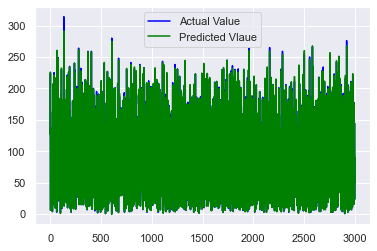

In [40]:
plt.plot(list(Y_test),color='blue',label='Actual Value')
plt.plot(X_test_prediction,color='green',label='Predicted Vlaue')
plt.legend()
plt.show()

In [43]:
#Mean absolute error
mae = metrics.mean_absolute_error(Y_test, X_test_prediction)
print(mae)

1.4807048829992613


Making the predictive system 

In [45]:
input_data = (1,65,180.0,94.0,29.0,105.0,42.8)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = xgBoostReg.predict(input_data_reshaped)
print(prediction)

print('The estimated calories burnt ', prediction[0])

[189.93608]
The estimated calories burnt  189.93608
